In [1]:
%matplotlib inline

In [2]:
import numpy

In [3]:
import seaborn
seaborn.set_style("whitegrid")

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
data = sm.datasets.get_rdataset("Guerry", "HistData").data

In [6]:
data.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [7]:
data.columns

Index(['dept', 'Region', 'Department', 'Crime_pers', 'Crime_prop', 'Literacy',
       'Donations', 'Infants', 'Suicides', 'MainCity', 'Wealth', 'Commerce',
       'Clergy', 'Crime_parents', 'Infanticide', 'Donation_clergy', 'Lottery',
       'Desertion', 'Instruction', 'Prostitutes', 'Distance', 'Area',
       'Pop1831'],
      dtype='object')

In [9]:
type(data)

pandas.core.frame.DataFrame

In [15]:
results = smf.ols('Crime_pers ~ center(standardize(Wealth)) + center(standardize(Pop1831))', data=data).fit()

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Crime_pers   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     3.384
Date:                Sat, 07 Oct 2017   Prob (F-statistic):             0.0387
Time:                        17:36:55   Log-Likelihood:                -885.56
No. Observations:                  86   AIC:                             1777.
Df Residuals:                      83   BIC:                             1784.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1.975e+04    787.468     25.086      0.000    1.82e+04    2.13e+04
center(standardize(Wealth))   -278.6171    827.073     -0.337      0.737   -1923.631    1366.397
center(standardize(Pop1831))  1946.2132    827.073      2.353      0.021     301.199    3591.227
==============================================================================
Omnibus:                        1.089   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                1.169
Skew:                           0.245   Prob(JB):                        0.557
Kurtosis:                       2.705   Cond. No.                         1.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
results.params

Intercept                       7843.058140
center(standardize(Wealth))     1270.108429
center(standardize(Pop1831))    -400.396927
dtype: float64

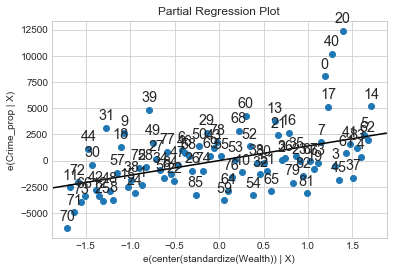

In [18]:
fig = sm.graphics.plot_partregress("Crime_prop", "center(standardize(Wealth))", [], data=data)